In [148]:
import pennylane as qml
import numpy as np
import math
from scipy.linalg import eig
import matplotlib.pyplot as plt

In [149]:
# Create 4 qubit QFT
dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
def qft():
    
    qml.Hadamard(3)
    #Qubit 3 rotations
    qml.ControlledPhaseShift(np.pi/2, wires=[2,3])
    qml.ControlledPhaseShift(np.pi/4, wires=[1,3])
    qml.ControlledPhaseShift(np.pi/8, wires=[0,3])

    qml.Hadamard(2)
    #Qubit 2 rotations
    qml.ControlledPhaseShift(np.pi/2, wires=[1,2])
    qml.ControlledPhaseShift(np.pi/4, wires=[0,2])
    
    qml.Hadamard(1)
    #Qubit 1 rotations
    qml.ControlledPhaseShift(np.pi/2, wires=[0,1])
    
    qml.Hadamard(0)
    
    #Swap gates
    qml.SWAP(wires=[0,3])
    qml.SWAP(wires=[1,2])

    return qml.probs(wires=[0, 1, 2, 3])
    #return qml.state()
    
qft()

array([0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625,
       0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625, 0.0625])

In [150]:
print(qml.draw(qft)())

0: ────────────────────────╭●─────────────────────╭●───────────╭●─────────H─╭SWAP───────┤ ╭Probs
1: ──────────────╭●────────│────────────╭●────────│──────────H─╰Rϕ(1.57)────│─────╭SWAP─┤ ├Probs
2: ────╭●────────│─────────│──────────H─╰Rϕ(1.57)─╰Rϕ(0.79)─────────────────│─────╰SWAP─┤ ├Probs
3: ──H─╰Rϕ(1.57)─╰Rϕ(0.79)─╰Rϕ(0.39)────────────────────────────────────────╰SWAP───────┤ ╰Probs


In [151]:
n_wires = 4

# Generate sawtooth function values
num_basis_states = 2**n_wires
x_vals = np.linspace(0, 2 * np.pi, num_basis_states, endpoint=False)  # 16 points
sawtooth_vals = x_vals - np.pi  # Apply f(x) = x - π

# Normalize to get valid amplitudes
norm = np.sqrt(np.sum(sawtooth_vals ** 2))
amplitudes = sawtooth_vals / norm

print("Normalized amplitudes:", np.round(amplitudes, 3))

Normalized amplitudes: [-0.431 -0.377 -0.323 -0.27  -0.216 -0.162 -0.108 -0.054  0.     0.054
  0.108  0.162  0.216  0.27   0.323  0.377]


In [159]:
dev = qml.device("default.qubit", wires=4)

# Use amplitudes calculated above to generate a state
target_amplitudes = np.array([
    -0.43133109, -0.37741471, -0.32349832, -0.26958193,
    -0.21566555, -0.16174916, -0.10783277, -0.05391639,
     0.0,         0.05391639,  0.10783277,  0.16174916,
     0.21566555,  0.26958193,  0.32349832,  0.37741471
])


@qml.qnode(dev)
def circuit():
    # Use state preparation to make a state = target_amplitudes
    qml.templates.MottonenStatePreparation(target_amplitudes, wires=[0, 1, 2, 3])
    return qml.state()

# Apply the decompose transform to the circuit
decomposed_circuit = qml.transforms.decompose(circuit)

# Draw the decomposed circuit
print("Decomposed Circuit:")
print(qml.draw(decomposed_circuit)())

final_state = circuit()

# Print the final basis states and their amplitudes
print("\nFinal Basis States and Amplitudes:")
for i, amplitude in enumerate(final_state):
    basis_state = f"{i:04b}"  # Convert index to 4-bit binary string
    print(f"|{basis_state}>: {amplitude}")

Decomposed Circuit:
0: ──RY(1.38)─╭●────────────╭●──────────────╭●──────────────────────────╭●──────────────────────────
1: ──RY(1.64)─╰X──RY(-0.86)─╰X─╭●───────────│─────────────╭●────────────│───────────────╭●──────────
2: ──RY(1.66)──────────────────╰X──RY(0.27)─╰X──RY(-0.06)─╰X──RY(-0.60)─╰X─╭●───────────│───────────
3: ──RY(1.71)──────────────────────────────────────────────────────────────╰X──RY(0.21)─╰X──RY(0.10)

───────────────╭●──────────────────────────────────────────────────────╭●──RZ(-3.14)─╭●─╭●────╭●───
───────────────│───────────────────────────╭●──────────────────────────│─────────────╰X─╰X─╭●─│──╭●
──╭●───────────│─────────────╭●────────────│─────────────╭●────────────│───────────────────╰X─╰X─╰X
──╰X──RY(0.28)─╰X──RY(-0.12)─╰X──RY(-0.18)─╰X──RY(-0.10)─╰X──RY(-0.45)─╰X──────────────────────────

──╭●──────────╭●──────────╭●─╭GlobalPhase(-1.57)─┤  State
──│─────╭●────│─────╭●────│──├GlobalPhase(-1.57)─┤  State
──╰X─╭●─│──╭●─│──╭●─│──╭●─│──├GlobalPhase(-1.57)─┤  State


In [160]:
dev = qml.device("default.qubit", wires=4)

@qml.qnode(dev)
#Create a circuit using the given gates to reach the Sawtooth wave final state
def manual_circuit():
    # Apply RY gates to all qubits
    qml.RY(1.38, wires=0)
    qml.RY(1.64, wires=1)
    qml.RY(1.66, wires=2)
    qml.RY(1.71, wires=3)

    # First layer of CNOT and RY gates
    qml.CNOT(wires=[0,1])
    qml.RY(-0.86, wires=1)
    qml.CNOT(wires=[0,1])

    qml.CNOT(wires=[1,2])
    qml.RY(0.27, wires=2)
    qml.CNOT(wires=[0,2])

    qml.RY(-0.06, wires=2)
    qml.CNOT(wires=[1,2])

    qml.RY(-0.60, wires=2)
    qml.CNOT(wires=[0,2])

    qml.CNOT(wires=[2, 3])
    qml.RY(0.21, wires=3)
    qml.CNOT(wires=[1, 3])

    qml.RY(0.10, wires=3)
    qml.CNOT(wires=[2,3])

    qml.RY(0.28, wires=3)
    qml.CNOT(wires=[0,3])

    qml.RY(-0.12, wires=3)
    qml.CNOT(wires=[2,3])

    qml.RY(-0.18, wires=3)
    qml.CNOT(wires=[1, 3])
    
    qml.RY(-0.10, wires=3)
    qml.CNOT(wires=[2, 3])
    
    qml.RY(-0.45, wires=3)
    qml.CNOT(wires=[0, 3])

    # Apply RZ gate
    qml.RZ(-3.14, wires=0)
    
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,2])
    qml.CNOT(wires=[0,2])
    qml.CNOT(wires=[1,2])
    
    qml.CNOT(wires=[0,2])
    qml.CNOT(wires=[2,3])
    qml.CNOT(wires=[1,3])
    qml.CNOT(wires=[2,3])
    qml.CNOT(wires=[0,3])
    qml.CNOT(wires=[2,3])
    qml.CNOT(wires=[1,3])
    qml.CNOT(wires=[2,3])
    qml.CNOT(wires=[0,3])

    # Apply global phase shifts
    qml.GlobalPhase(-1.57)

    # End of sawtooth wave initialisation

    #qft()
    qml.QFT(wires=[0, 1, 2, 3])

    # Measure the probabilities of the final state
    return qml.probs(wires=[0, 1, 2, 3])

# Compute the final state vector
probabilities = manual_circuit()

probabilities

array([0.01192242, 0.3046173 , 0.0800028 , 0.03802981, 0.02294637,
       0.01680125, 0.01377075, 0.01178712, 0.01152778, 0.01178792,
       0.01377028, 0.01680609, 0.02294588, 0.03805178, 0.08000331,
       0.30522914])

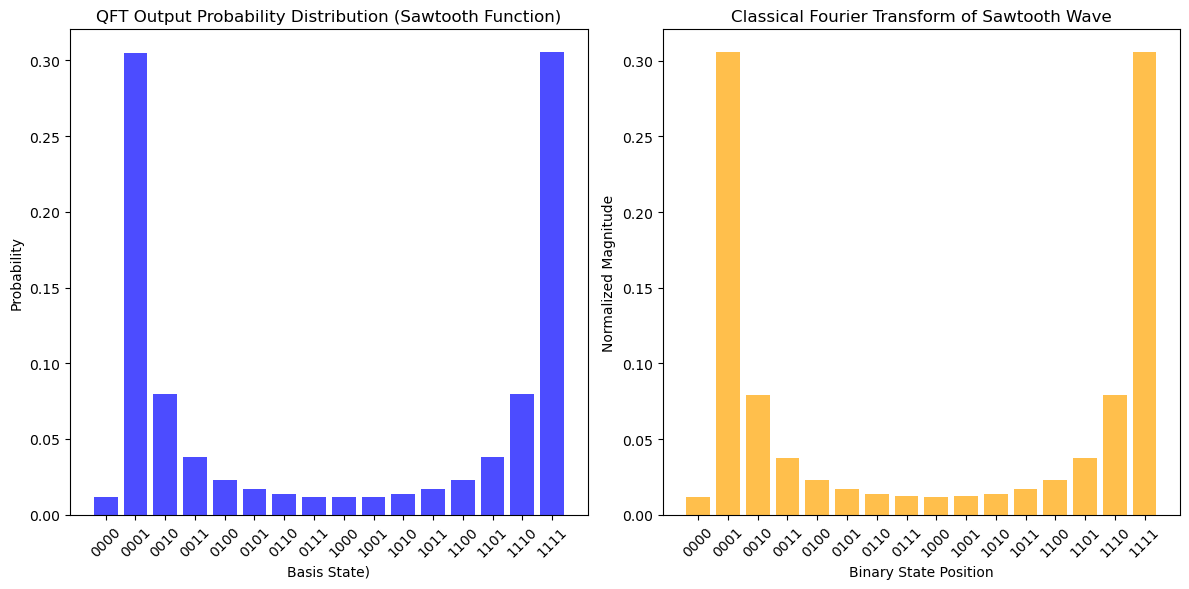

In [162]:
classical_fft = np.fft.fft(sawtooth_vals)
classical_probs = np.abs(classical_fft) ** 2
classical_probs /= np.sum(classical_probs)  # Normalise probabilities

# Plot results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Quantum Fourier Transform output
ax1.bar(basis_states, probabilities, color='blue', alpha=0.7)
ax1.set_title("QFT Output Probability Distribution (Sawtooth Function)")
ax1.set_xlabel("Basis State)")
ax1.set_ylabel("Probability")
ax1.tick_params(axis='x', rotation=45)

# Classical Fourier Transform output
ax2.bar(basis_states, classical_probs, color='orange', alpha=0.7)
ax2.set_title("Classical Fourier Transform of Sawtooth Wave")
ax2.set_xlabel("Binary State Position")
ax2.set_ylabel("Normalized Magnitude")
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()